# Houlberg profile reproducer 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sympy

In [2]:
T_data = pd.read_csv("/home/dominik/Code/IFPILM/Magisterka/houlberg-profiles.csv")
T_data.iloc[0] = {"x": 0, "ToverT0": 1, "neoverne0": 1}
T_data.iloc[-1]["x"] = 1

zeff = pd.read_csv("/home/dominik/Code/IFPILM/Magisterka/houlberg-profiles-zeff.csv")

fig, ax = plt.subplots(sharex=True)
T_data.plot(x="x", ax=ax)
ax2 = plt.twinx()
zeff.plot(x="x", ax=ax2, c="g")
ax.set_xlim(0, 1)
plt.legend()

FileNotFoundError: [Errno 2] No such file or directory: '/home/dominik/Code/IFPILM/Magisterka/houlberg-profiles.csv'

In [ ]:
import sympy
# sympy.init_printing()
rho, T0, Ta, ne0, nea, nC, e, = sympy.symbols("rho T_0 T_a n_{e0} n_{ea} n_{C-6+} e")
n_i = sympy.Function('n_i')(rho)

In [ ]:
T = (T0 - Ta) * (1 - rho**2) + Ta

In [ ]:
n_e = (ne0 - nea) * sympy.sqrt(1 - rho**2) + nea

In [ ]:
charge_density = (n_i + 6 * nC - n_e) * e

In [ ]:
n_i_solution = sympy.solve(charge_density, n_i)[0]

In [ ]:
nea_ratio = 0.22

In [ ]:
Z_eff = (n_i + 6**2 * nC)/n_e

In [ ]:
Z_eff.subs(n_i, n_i_solution)

In [ ]:
_.subs(nea, nea_ratio * ne0)

In [ ]:
_.subs(ne0, 6.5e19 + 6 * nC)

In [ ]:
Zeff_substitutions = _.subs(nC, 5e18)

In [ ]:
Zeff_substitutions.subs(rho, 0)

In [ ]:
Zeff_substitutions.subs(rho, 1)

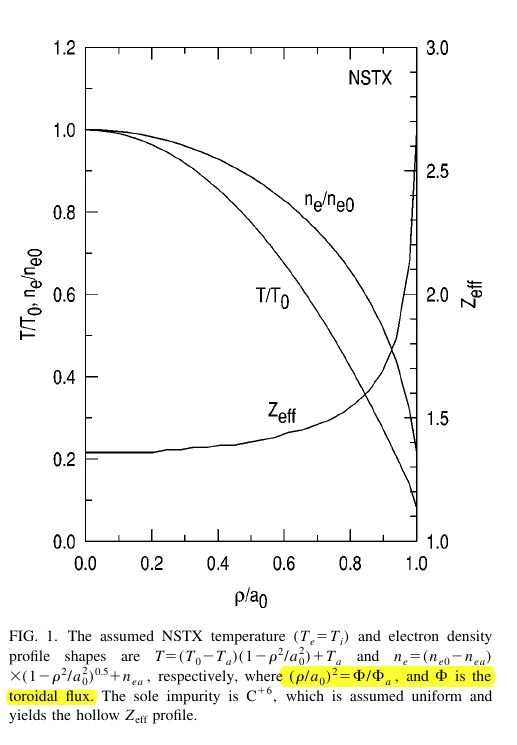

In [ ]:
from scipy import interpolate

In [ ]:
interpolate.CubicSpline

In [ ]:
x0 = zeff.x.copy()
from scipy.optimize import curve_fit

def poly(x, b, c, d, e):
    return zeff.Zeff.iloc[0] + b*x + c*x**2 + d * x**3 + e * x**4

def exponent(x, a, b, c, d):
    return a * (np.exp(b * x) - 1) + c * (np.exp(d * x) - 1) + zeff.Zeff.iloc[0]

def inverse(x, a):
    return a / (1.1 - x)**2 + zeff.Zeff.iloc[0]

x0.iloc[-1] = 1
indices = [0, 5, 10, 14, 21, 25]
plt.plot(x0, zeff.Zeff)
plt.scatter(x0[indices], zeff.Zeff[indices])
# plt.plot(x0, x0**13.790008 + 1.4542466)
# plt.plot(x0, x0**-2.2004218)
# plt.plot(x0, np.exp(np.arctan(x0**2)))
func = inverse
result = curve_fit(func, x0[indices], zeff.Zeff[indices])
display(result)
plt.plot(x0, func(x0, *result[0]))

In [ ]:
def inverse_diff(x, a):
    return +2 * a / (1.1 - x)

In [ ]:
from scipy.signal import savgol_filter

In [ ]:
poly = interpolate.CubicSpline(zeff.x, zeff.Zeff, bc_type=((1, 0), (1, 10)))
# poly = np.polynomial.Polynomial.fit(zeff.x, zeff.Zeff, 2)
# plt.plot(zeff.x, sympy.lambdify(rho, Zeff_substitutions)(zeff.x))
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(zeff.x, zeff.Zeff)
ax1.plot(zeff.x, savgol_filter(zeff.Zeff, 9, 2))
x_interpolation = np.linspace(0, 1, 1000)
ax1.plot(x_interpolation, poly(x_interpolation))

T_data['Zeff'] = inverse(T_data.x, *result[0])
T_data['Zeff_derivative'] = inverse_diff(T_data.x, *result[0])

ax2.plot(T_data.x, T_data.Zeff_derivative)

In [ ]:
T_data

$$Z_{eff} = \sum_i n_i q_i / \sum_i n_i$$
$$Z_{eff} = (n_D q_D + n_C * q_C) / (n_D + n_C)$$

In [ ]:
sympy.lambdify(
    (
        n_i.diff(rho),
        n_i,
        nC,
    ),
    ((n_i + nC * 6) / (n_i + nC)).diff(rho)
)

$$n_i + 6 n_C - n_e = 0$$

In [ ]:
T_data

In [ ]:
(T_data["n_D"] + T_data["n_C"]) / T_data["n_e"]

In [ ]:
nC0_value = 5e18
C6charge = 6
ne0_value = 6.5e19 + C6charge * nC0_value
T_data["n_C"] = nC0_value
T_data["n_e"] = ne0_value * T_data["neoverne0"]
T_data["n_D_charge"] = T_data["n_e"] - C6charge * T_data["n_C"] 
T_data["n_D_zeff_no_square"] = T_data["Zeff"] * T_data["n_e"] - C6charge * T_data["n_C"]
T_data["charge_density_charge"] = T_data["n_D_charge"] - T_data["n_e"] + C6charge * T_data["n_C"]
T_data["charge_density_zeff_no_square"] = T_data["n_D_zeff_no_square"] - T_data["n_e"] + C6charge * T_data["n_C"]
T_data["n_D"] = T_data["n_D_zeff_no_square"]
T_data["Zeff_reproduced"] = (T_data["n_D"] + T_data["n_C"])/T_data["n_e"]
T_data.loc[:, ["x", "n_C", "n_e", "n_D_charge", "n_D_zeff_no_square"]].plot(x="x")
T_data.loc[:, ["x", "charge_density_charge", "charge_density_zeff_no_square"]].plot(x="x")
T_data["ToverT0_derivative"] = sympy.lambdify((T0, Ta, rho), T.diff(rho))(1,
                                                                          T_data["ToverT0"].iloc[-1],
                                                                          T_data["x"])
T_data["n_e_derivative"] = sympy.lambdify((ne0, nea, rho), n_e.diff(rho))(ne0_value,
                                                                                T_data["neoverne0"].iloc[-1],
                                                                                T_data["x"])
T_data.drop(labels=["ToverT0", "neoverne0", "Zeff"], axis=1).plot(x="x")
T_data.loc[:, ["x", "ToverT0", "ToverT0_derivative"]].plot(x="x")
# T_data.loc[:, ["x",
#                "n_e",
#                "n_e_derivative",
#               ]].plot(x="x")
T_data["n_C_derivative"] = 0
T_data["n_D_derivative"] = T_data["Zeff_derivative"] * T_data["n_e"] + T_data["Zeff"] * T_data["n_e_derivative"] - 6 * T_data["n_C_derivative"]

In [ ]:
from scipy import integrate

In [ ]:
T_data.Zeff

In [ ]:
# plt.plot(T_data["x"], integrate.cumtrapz(T_data["Zeff_derivative"], T_data["x"], initial= T_data["Zeff"].iloc[0]))
plt.plot(T_data["x"], T_data["Zeff"])

In [ ]:
T_data.plot(x="x", y="Zeff_derivative")

In [ ]:
T_data.to_csv("/home/dominik/HoulbergNSTX.csv")